<a href="https://colab.research.google.com/github/cielo112/Decathlon-Dashboard/blob/main/Decathlon_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Description

This project aims to uncover key business insights by analyzing the sales and performance data of different Decathlon Branches. The analysis focuses on the following key aspects: the top 5 models sold based on their sales generated, the total number of transactions made per branch, the average amount spent per transaction, the average number of items bought per transaction, and the number of purchases made at different times of day. By addressing these questions, the project aims to provide strategic recommendations for optimizing sales strategies, enhancing customer experiences, and driving growth in the business.


**Table of Contents**

* [Section 1: **Loading the Dependencies and the Dataset**](#1)
* [Section 2: **Data Cleaning**](#2)
* [Subsection 2.1: **Fixing the Date Column**](#3)
* [Subsection 2.2: **Fixing the Customer ID Column**](#4)
* [Subsection 2.3: **Fixing the Transaction ID Column**](#5)
* [Section 3: **Exploratory Data Analysis**](#6)
* [Subsection 3.1: **Top 5 Models in Sales**](#7)
* [Subsection 3.2: **Number of Transactions per Branch**](#8)
* [Subsection 3.3: **Average Basket Value**](#9)
* [Subsection 3.4: **Average Basket Size**](#10)
* [Subsection 3.5: **Total Sales per Store**](#11)
* [Subsection 3.6: **Number of Purchases at Different Times of Day**](#12)


# Loading the Dependencies and the Dataset <a name='1'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import missingno

The task provided a data description table that specifies the data types for each column. In order to ensure that the dataset contains the values as required for the analysis, the csv file was uploaded using the these data types for reference.

Inconsistencies however appeared and they are listed as follows:
date transcation cannot be written as datetime

* The the_transaction_id contains non numerical characters
*   Date transaction is not accepted into a datetime format
*   f_qty_item has non numerical values included
* The ctm_customer_id contains float and non-numerical values


In order to facilitate the loading and the eventual data cleaning, the mismatched columns with their data types will be temporarily stored as 'object' data type.

In [2]:
df = pd.read_csv(r'/content/drive/MyDrive/Datasets/recruitment_transactions_201907_201912.csv',
  dtype = {
     'the_transaction_id': 'object',
     'the_date_transaction': 'object',
     'sku_num_sku_r3': 'int',
     'mdl_num_model_r3': 'int',
     'ctm_customer_id': 'object',
     'the_to_type': 'object',
     'f_qty_item': 'int',
     'f_to_tax_in': 'float'
  })

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1788103 entries, 0 to 1788102
Data columns (total 9 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   ctm_customer_id         object 
 1   the_transaction_id      object 
 2   but_name_business_unit  object 
 3   the_date_transaction    object 
 4   f_qty_item              int64  
 5   f_to_tax_in             float64
 6   the_to_type             object 
 7   sku_num_sku_r3          int64  
 8   mdl_num_model_r3        int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 122.8+ MB


In [4]:
df.head()

,ctm_customer_id,the_transaction_id,but_name_business_unit,the_date_transaction,f_qty_item,f_to_tax_in,the_to_type,sku_num_sku_r3,mdl_num_model_r3
0,NaN,7-1981-1981-20190601124318-105-468,Decathlon Dasmarinas,2019-06-01 12:43:18,1,180.0,offline,2170443,8379478
1,2091556773461.0,7-1981-1981-20190601130634-103-2440,Decathlon Dasmarinas,2019-06-01 13:06:34,1,160.0,offline,2308514,8395063
2,2091556773461.0,7-1981-1981-20190601130634-103-2440,Decathlon Dasmarinas,2019-06-01 13:06:34,1,30.0,offline,1413822,8191613
3,2091556773461.0,7-1981-1981-20190601130634-103-2440,Decathlon Dasmarinas,2019-06-01 13:06:34,1,550.0,offline,2663481,8529024
4,2091556773461.0,7-1981-1981-20190601130634-103-2440,Decathlon Dasmarinas,2019-06-01 13:06:34,1,30.0,offline,1413822,8191613


# Data Cleaning <a name='2'></a>

**Fixing the the_date_transaction Column** <a name='3'></a>

In order to facilitate further data transformation as required later, we will be transforming the the_date_transaction column into the datetime format.

In [5]:
df['the_date_transaction'] = pd.to_datetime(df['the_date_transaction'])

In [6]:
def create_hour_range(time):
    start_hour = time.hour
    end_hour = (time + pd.Timedelta(hours=1)).hour

    # Replace the 24 hour format by subtracting 12
    # everytime the end hour goes above it
    if end_hour >= 12:
        end_hour -= 12
        end_suffix = 'PM'
    else:
        end_suffix = 'AM'

    # If the end hour is exactly 0 after subtracting 12,
    # write it as 12
    if end_hour == 0:
        end_hour = 12

    # Same function as above but applied to the start hour
    if start_hour >= 12:
        start_hour -= 12
        start_suffix = 'PM'
    else:
        start_suffix = 'AM'

    if start_hour == 0:
        start_hour = 12

    return f"{start_hour} {start_suffix}-{end_hour} {end_suffix}"

In [7]:
df['Time of Day'] = df['the_date_transaction'].apply(create_hour_range)

In [8]:
def add_month_columns(data_frame, date_column_name):

    # Add new columns for month number and month name
    data_frame['month_number'] = data_frame[date_column_name].dt.month
    data_frame['month_name'] = data_frame[date_column_name].dt.strftime('%B')

    return data_frame

In [9]:
df = add_month_columns(df, 'the_date_transaction')

In [10]:
df.head()

,ctm_customer_id,the_transaction_id,but_name_business_unit,the_date_transaction,f_qty_item,f_to_tax_in,the_to_type,sku_num_sku_r3,mdl_num_model_r3,Time of Day,month_number,month_name
0,NaN,7-1981-1981-20190601124318-105-468,Decathlon Dasmarinas,2019-06-01 12:43:18,1,180.0,offline,2170443,8379478,12 PM-1 PM,6,June
1,2091556773461.0,7-1981-1981-20190601130634-103-2440,Decathlon Dasmarinas,2019-06-01 13:06:34,1,160.0,offline,2308514,8395063,1 PM-2 PM,6,June
2,2091556773461.0,7-1981-1981-20190601130634-103-2440,Decathlon Dasmarinas,2019-06-01 13:06:34,1,30.0,offline,1413822,8191613,1 PM-2 PM,6,June
3,2091556773461.0,7-1981-1981-20190601130634-103-2440,Decathlon Dasmarinas,2019-06-01 13:06:34,1,550.0,offline,2663481,8529024,1 PM-2 PM,6,June
4,2091556773461.0,7-1981-1981-20190601130634-103-2440,Decathlon Dasmarinas,2019-06-01 13:06:34,1,30.0,offline,1413822,8191613,1 PM-2 PM,6,June


**Fixing the ctm_customer_id Column** <a name='4'></a>

In [11]:
df.isnull().sum()

ctm_customer_id           229435
the_transaction_id             0
but_name_business_unit         0
the_date_transaction           0
f_qty_item                     0
f_to_tax_in                    0
the_to_type                    0
sku_num_sku_r3                 0
mdl_num_model_r3               0
Time of Day                    0
month_number                   0
month_name                     0
dtype: int64

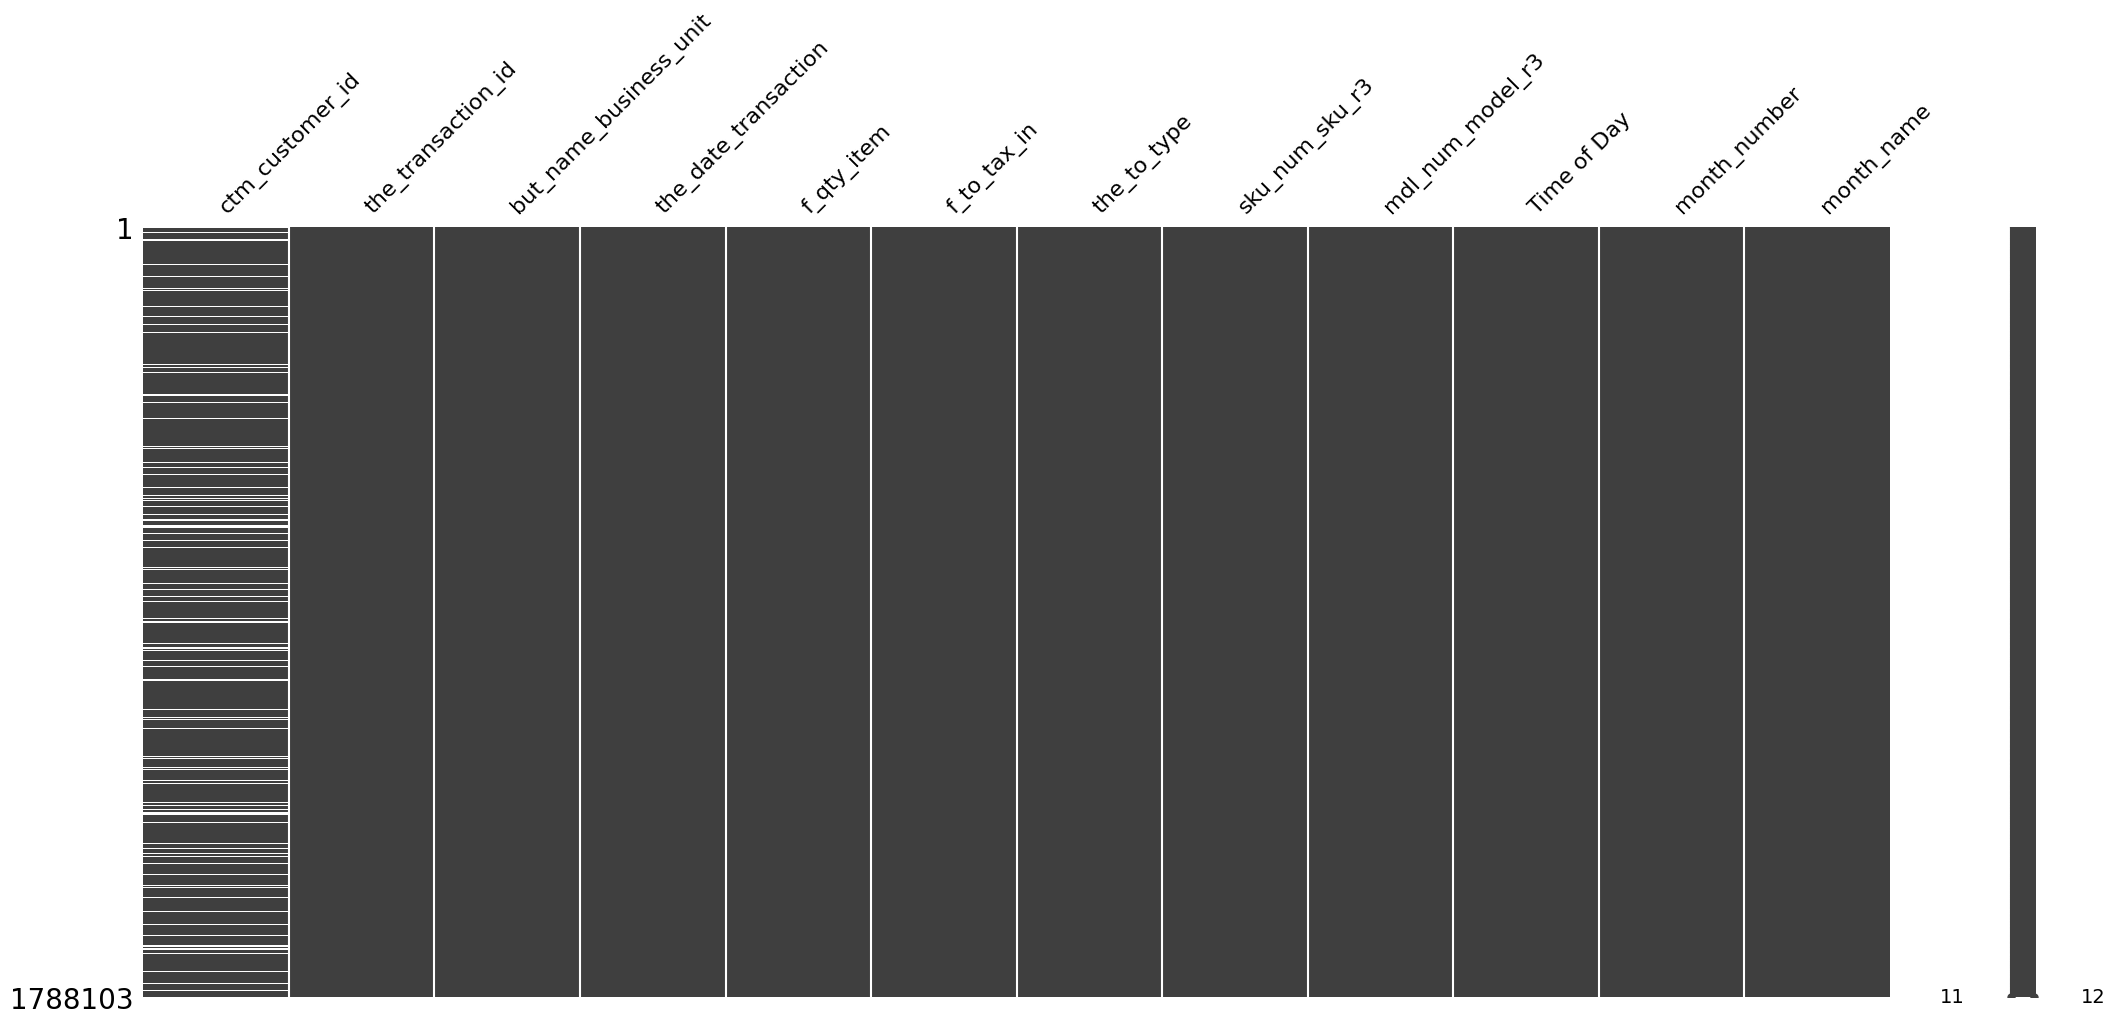

In [12]:
import missingno as msno
msno.matrix(df)
plt.show()

From the missing value matrix, it can be seen that values are only missing in the ctm_customer_id_column while the rest are already complete. Based on the dataset description table, these missing values for this column is not actually missing but rather corresponds to purchases made by customers who are non-members.

In order to set the ctm_customer_id column to the correct data type, we are going to do the following:

* Replace the NaN values with "Non Member" to make it clear that these transactions exist but only made by non members.
* Remove the non-numeric characters from the customer id so that it can be properly recoreded as integer

In [13]:
def obj_to_int_cleaner(df, col):
    '''
    This function cleans the customer id column by removing the
    non-numeric characters for the member id and then replacing the missing
    values with "Non Member".
    '''
    # Replace the missing values with 'Non Members'
    df[col].fillna('Non Members', inplace=True)

    # Create a function to remove non-numeric characters
    def remove_punctuation(input_string):
        import re
        import string
        # Make a regular expression that matches all punctuation
        regex = re.compile('[%s]' % re.escape(string.punctuation))
        # Use the regex
        return regex.sub('', input_string)

    # Apply the remove_punctuation function and convert to integer
    def convert_to_integer(value):
        cleaned_value = remove_punctuation(str(value))
        if cleaned_value.isdigit():
            return int(cleaned_value)
        else:
            return value

    df[col] = df[col].apply(lambda x: convert_to_integer(x))

    return df


In [14]:
df_clean = obj_to_int_cleaner(df, 'ctm_customer_id')

**Fixing the the_transaction_id Column** <a name='5'></a>

The Transaction ID column suffers from the same problems as with the Customer ID so we can simply use the obj_to_int function defined in the previous section to clean the Transaction ID column

In [15]:
df_clean = obj_to_int_cleaner(df, 'the_transaction_id')

In [16]:
df_clean

,ctm_customer_id,the_transaction_id,but_name_business_unit,the_date_transaction,f_qty_item,f_to_tax_in,the_to_type,sku_num_sku_r3,mdl_num_model_r3,Time of Day,month_number,month_name
0,Non Members,71981198120190601124318105468,Decathlon Dasmarinas,2019-06-01 12:43:18,1,180.0,offline,2170443,8379478,12 PM-1 PM,6,June
1,20915567734610,719811981201906011306341032440,Decathlon Dasmarinas,2019-06-01 13:06:34,1,160.0,offline,2308514,8395063,1 PM-2 PM,6,June
2,20915567734610,719811981201906011306341032440,Decathlon Dasmarinas,2019-06-01 13:06:34,1,30.0,offline,1413822,8191613,1 PM-2 PM,6,June
3,20915567734610,719811981201906011306341032440,Decathlon Dasmarinas,2019-06-01 13:06:34,1,550.0,offline,2663481,8529024,1 PM-2 PM,6,June
4,20915567734610,719811981201906011306341032440,Decathlon Dasmarinas,2019-06-01 13:06:34,1,30.0,offline,1413822,8191613,1 PM-2 PM,6,June
...,...,...,...,...,...,...,...,...,...,...,...,...
1788098,20914311967980,71516151620191130192329110509,Decathlon.ph,2019-11-30 19:23:29,1,150.0,online,630322,8331381,7 PM-8 PM,11,November
1788099,20914594917690,71516151620191201124250110532,Decathlon.ph,2019-12-01 12:42:50,1,150.0,online,630322,8331381,12 PM-1 PM,12,December
1788100,20914594917690,71516151620191201124250110532,Decathlon.ph,2019-12-01 12:42:50,1,150.0,online,630322,8331381,12 PM-1 PM,12,December
1788101,20917171611990,71516151620191202205445110806,Decathlon.ph,2019-12-02 20:54:45,1,150.0,online,630322,8331381,8 PM-9 PM,12,December


# Exploratory Data Analysis <a name='6'></a>

In this section we will be performing the following tasks as indicated in the project description:

1. Produce a report of the top 5 models per month in physical stores. How much
sales did they generate and what is its contribution (proportion in %) to overall
sales?
2. What is the ratio of identified transactions (transactions made by members) per
store? Rank them from highest to lowest.
3. Find the average basket value and average basket size per store. Which stores
are performing well? Which ones are not? Please state your consideration(s).
4. If there is any timing of the day that is most popular for purchases in stores?
Please state your consideration(s).

### Top 5 Model in Sales per Month <a name='7'></a>

In [17]:
# Create a sales column by multiplying the number of items bought and the price
df_clean['Sales'] = df_clean['f_qty_item'] * df_clean['f_to_tax_in']
df_clean.head()

,ctm_customer_id,the_transaction_id,but_name_business_unit,the_date_transaction,f_qty_item,f_to_tax_in,the_to_type,sku_num_sku_r3,mdl_num_model_r3,Time of Day,month_number,month_name,Sales
0,Non Members,71981198120190601124318105468,Decathlon Dasmarinas,2019-06-01 12:43:18,1,180.0,offline,2170443,8379478,12 PM-1 PM,6,June,180.0
1,20915567734610,719811981201906011306341032440,Decathlon Dasmarinas,2019-06-01 13:06:34,1,160.0,offline,2308514,8395063,1 PM-2 PM,6,June,160.0
2,20915567734610,719811981201906011306341032440,Decathlon Dasmarinas,2019-06-01 13:06:34,1,30.0,offline,1413822,8191613,1 PM-2 PM,6,June,30.0
3,20915567734610,719811981201906011306341032440,Decathlon Dasmarinas,2019-06-01 13:06:34,1,550.0,offline,2663481,8529024,1 PM-2 PM,6,June,550.0
4,20915567734610,719811981201906011306341032440,Decathlon Dasmarinas,2019-06-01 13:06:34,1,30.0,offline,1413822,8191613,1 PM-2 PM,6,June,30.0


In [18]:
# Create a filter to get only the data from physical stores
physical_store_filter = df_clean['but_name_business_unit'] != 'Decathlon.ph'
df_ps = df_clean[physical_store_filter]

In [19]:
# Group the dataset by month, and then in each month group it further into the different models
sales_grouped_by_month_model = df_ps.groupby(['month_name','mdl_num_model_r3'])['Sales'].sum()

# Get the top 5 models from each month by applying a sorting function for each
top_models_by_month = sales_grouped_by_month_model.groupby('month_name', group_keys=False).apply(lambda group: group.sort_values(ascending=False)[:5])

# Get the total sales generated for each month
total_sales_per_month = sales_grouped_by_month_model.groupby('month_name').sum()


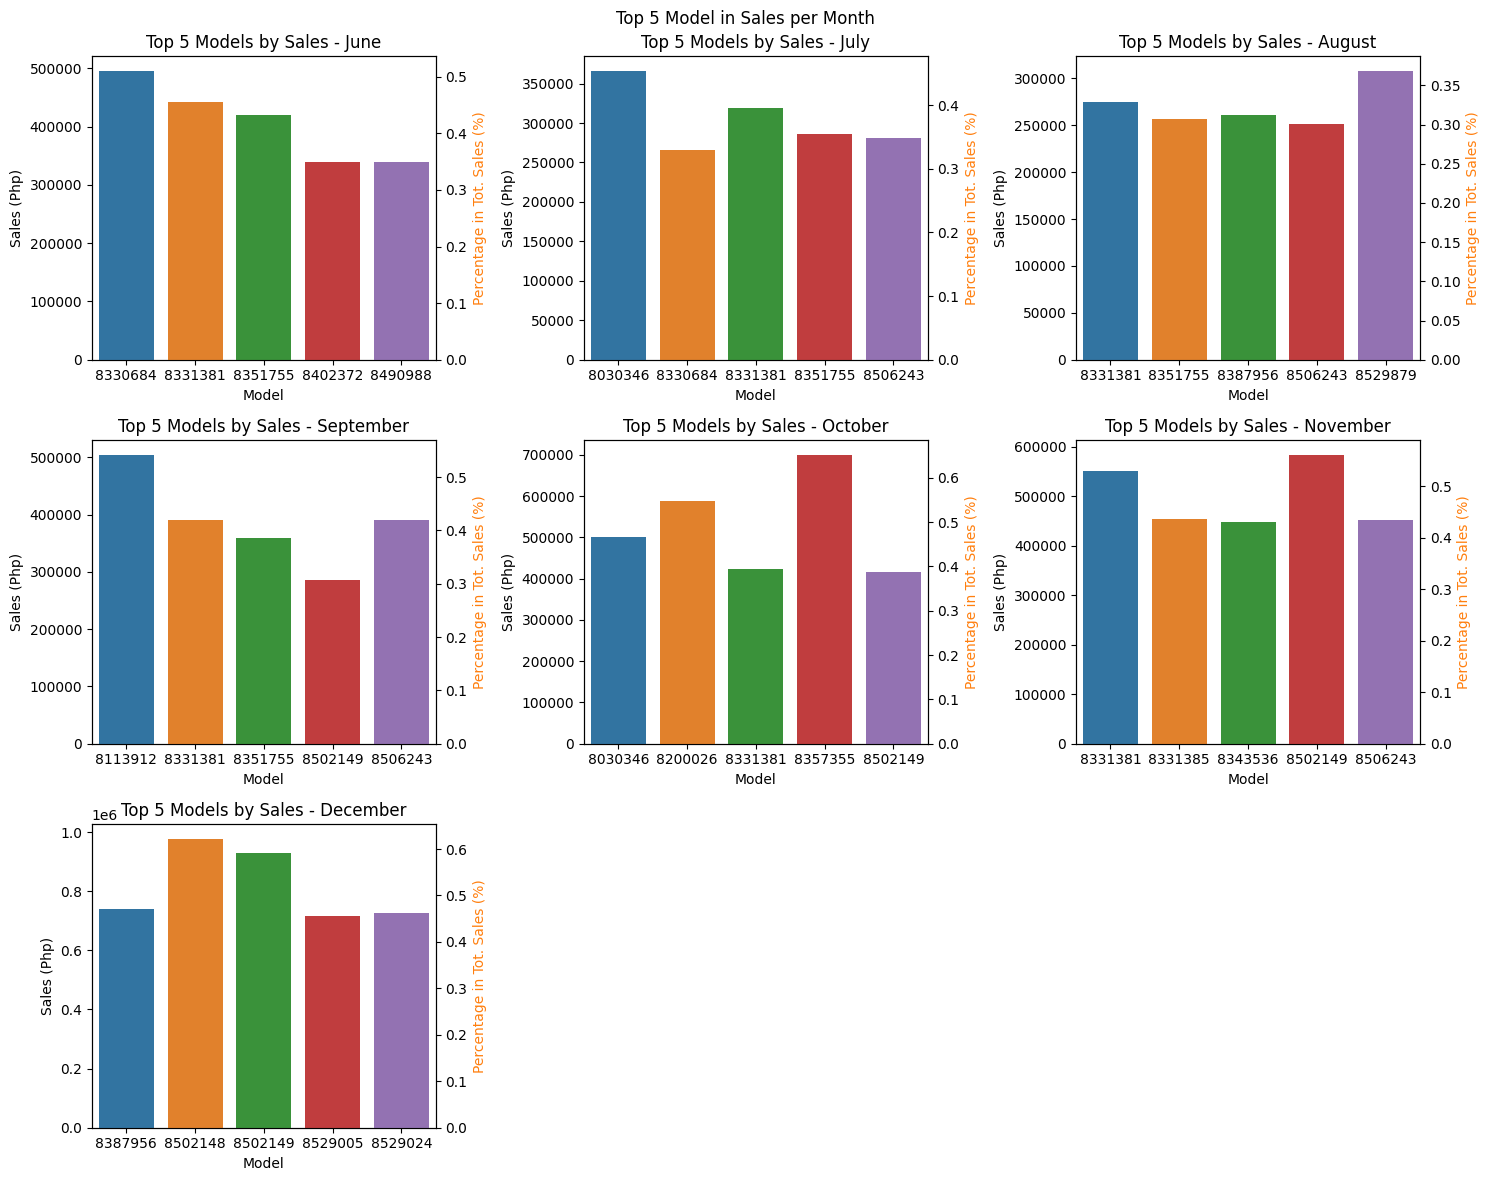

In [20]:
# Get unique month names for subplot titles
months = [
    'June',
    'July',
    'August',
    'September',
    'October',
    'November',
    'December'
]

# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 12))

# Loop through each month and create a subplot for each
for i, month in zip(range(1, 8), months):
    data = top_models_by_month.loc[month].nlargest(5).reset_index()  # Select top 5 models for the month

    ax = plt.subplot(3, 3, i)
    sns.barplot(data=data, x='mdl_num_model_r3', y='Sales', ax=ax)

    # Create a twin y-axis for Percentage Contribution
    ax2 = ax.twinx()

    # Calculate percentage contribution for each model
    data['Percentage'] = data['Sales'] / total_sales_per_month[month] * 100
    sns.barplot(data=data, x='mdl_num_model_r3', y='Percentage', ax=ax2 )
    ax2.set_ylabel('Percentage in Tot. Sales (%)', color='tab:orange')

    ax.set_title(f'Top 5 Models by Sales - {month}')
    ax.set_xlabel('Model')
    ax.set_ylabel('Sales (Php)')

# Hide any unused subplots
for j in range(len(months), len(axes)):
    axes[j].axis('off')

plt.suptitle('Top 5 Model in Sales per Month')
plt.tight_layout()
plt.show()

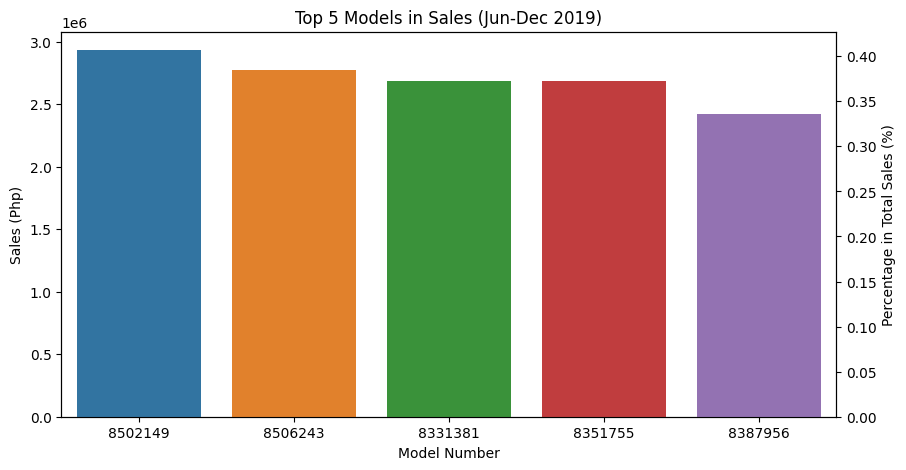

In [21]:
# Graph the top 5 models in terms of sales from June to December

sales_grouped_by_model = df_ps.groupby('mdl_num_model_r3')['Sales'].sum()
top_5_models_in_sales = sales_grouped_by_model.sort_values(ascending=False)[:5]

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=top_5_models_in_sales.index, y=top_5_models_in_sales.values,
            order=top_5_models_in_sales.sort_values(ascending=False).index)
ax.set_ylabel('Sales (Php)')

ax2 = ax.twinx()
total_sales = df_ps['f_to_tax_in'].sum()
sns.barplot(x=top_5_models_in_sales.index, y=top_5_models_in_sales.values*100/total_sales,
            order=top_5_models_in_sales.sort_values(ascending=False).index, ax= ax2)
ax2.set_ylabel('Percentage in Total Sales (%)')
ax.set_xlabel('Model Number')

plt.title('Top 5 Models in Sales (Jun-Dec 2019)')
plt.show()

###  Number of Transactions per Store Branch <a name='8'></a>

In [22]:
member_filter = df_clean['ctm_customer_id'] != 'Non Members'
members_only_df = df_clean[member_filter]

In [23]:
num_trans_grouped_by_branch = members_only_df.groupby('but_name_business_unit')['the_transaction_id'].nunique()
num_trans_grouped_by_branch

but_name_business_unit
Alabang                 134159
Decathlon Dasmarinas     56696
Decathlon.ph              9546
Masinag                  44004
Pasig                   106652
Name: the_transaction_id, dtype: int64

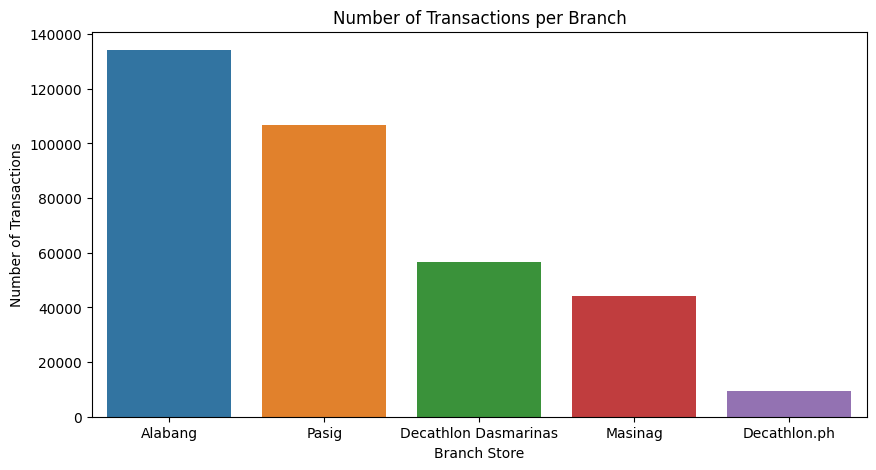

In [24]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(
    x = num_trans_grouped_by_branch.index,
    y = num_trans_grouped_by_branch.values,
    order = num_trans_grouped_by_branch.sort_values(ascending=False).index,
)
plt.title('Number of Transactions per Branch')
plt.xlabel('Branch Store')
plt.ylabel('Number of Transactions')
plt.show()

###Average Basket Value <a name='9'></a>

In [25]:
basket_value_per_store = df_clean.groupby(['but_name_business_unit', 'the_transaction_id'])['Sales'].sum()

In [26]:
basket_value_per_store

but_name_business_unit  the_transaction_id            
Alabang                 715161516201906281152021011        150.0
                        715161516201906281152031012        450.0
                        715161516201906281152051013        300.0
                        715161516201906281152061014        280.0
                        715161516201906281152071015        600.0
                                                           ...  
Pasig                   719861986201912302204381033861     420.0
                        719861986201912302204391178996     240.0
                        719861986201912302204411178997     330.0
                        719861986201912302205431033862    4120.0
                        719861986201912302211451021838    3880.0
Name: Sales, Length: 429048, dtype: float64

In [27]:
ave_basket_value_per_store = basket_value_per_store.groupby('but_name_business_unit').mean()

In [28]:
ave_basket_value_per_store

but_name_business_unit
Alabang                 1613.417234
Decathlon Dasmarinas    1116.810152
Decathlon.ph            2561.076570
Masinag                 1793.471241
Pasig                   2168.967619
Name: Sales, dtype: float64

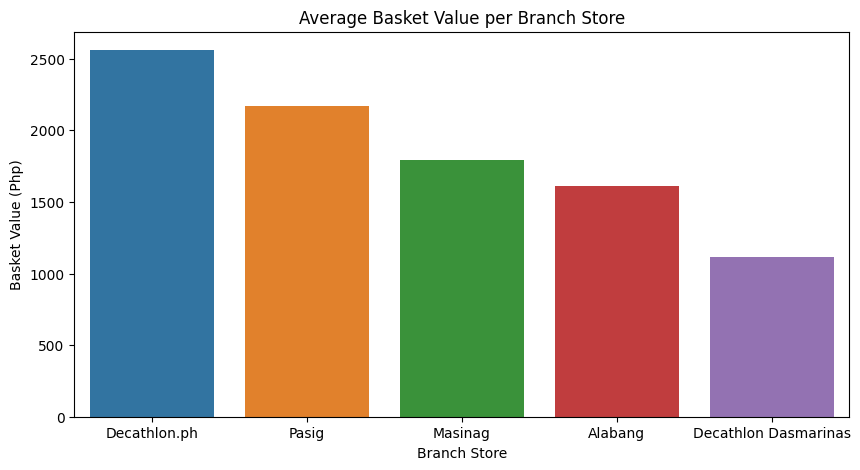

In [29]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(
    x = ave_basket_value_per_store.index,
    y = ave_basket_value_per_store.values,
    order = ave_basket_value_per_store.sort_values(ascending=False).index,
)
plt.title('Average Basket Value per Branch Store')
plt.xlabel('Branch Store')
plt.ylabel('Basket Value (Php)')
plt.show()


###Average Basket Size <a name='10'></a>

In [30]:
basket_size_per_store = df_clean.groupby(['but_name_business_unit', 'the_transaction_id'])['f_qty_item'].sum()

In [31]:
basket_size_per_store

but_name_business_unit  the_transaction_id            
Alabang                 715161516201906281152021011        1
                        715161516201906281152031012        2
                        715161516201906281152051013        2
                        715161516201906281152061014        1
                        715161516201906281152071015        1
                                                          ..
Pasig                   719861986201912302204381033861     1
                        719861986201912302204391178996     3
                        719861986201912302204411178997     2
                        719861986201912302205431033862    14
                        719861986201912302211451021838    11
Name: f_qty_item, Length: 429048, dtype: int64

In [32]:
ave_basket_size_per_store = basket_size_per_store.groupby('but_name_business_unit').mean()

In [33]:
ave_basket_size_per_store

but_name_business_unit
Alabang                 3.492754
Decathlon Dasmarinas    2.566489
Decathlon.ph            7.245583
Masinag                 4.159028
Pasig                   4.597956
Name: f_qty_item, dtype: float64

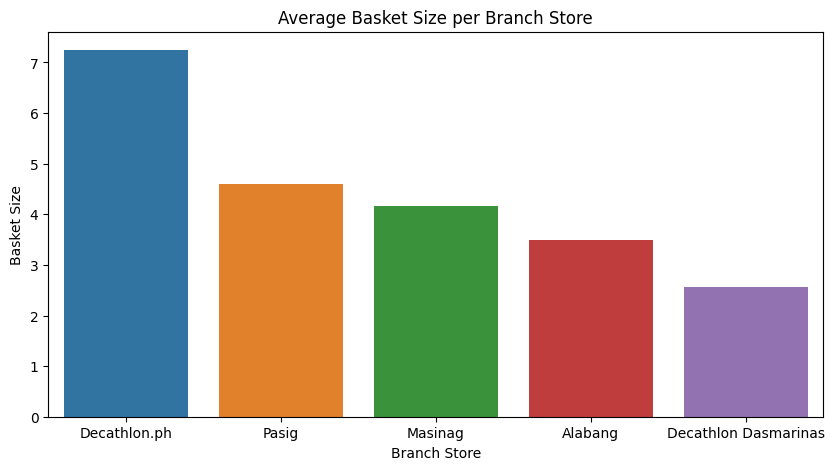

In [34]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(
    x = ave_basket_size_per_store.index,
    y = ave_basket_size_per_store.values,
    order = ave_basket_size_per_store.sort_values(ascending=False).index
)
plt.title('Average Basket Size per Branch Store')
plt.xlabel('Branch Store')
plt.ylabel('Basket Size')
plt.show()

###Total Sales per Store <a name='11'></a>

In [35]:
total_sales_per_store = df_clean.groupby('but_name_business_unit')['Sales'].sum()

In [36]:
total_sales_per_store

but_name_business_unit
Alabang                 2.694149e+08
Decathlon Dasmarinas    7.791203e+07
Decathlon.ph            2.565430e+07
Masinag                 9.368376e+07
Pasig                   2.820699e+08
Name: Sales, dtype: float64

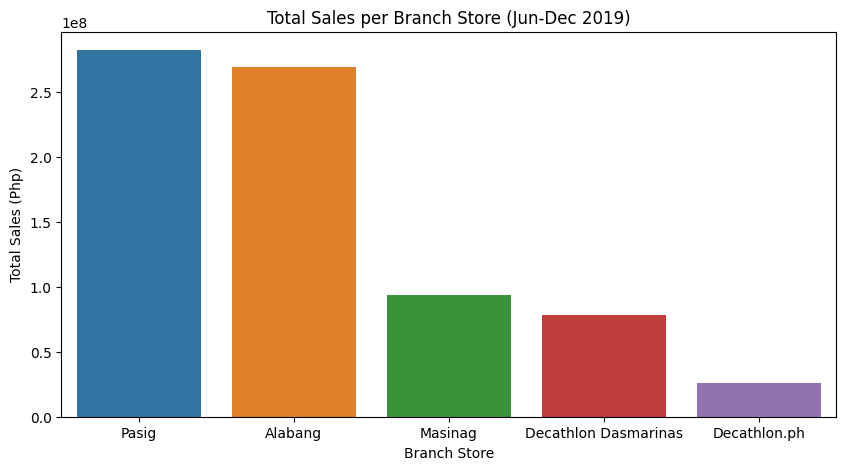

In [37]:
fig, axs = plt.subplots(figsize=(10,5))
sns.barplot(
    x = total_sales_per_store.index,
    y = total_sales_per_store.values,
    order = total_sales_per_store.sort_values(ascending=False).index
)
plt.title('Total Sales per Branch Store (Jun-Dec 2019)')
plt.xlabel('Branch Store')
plt.ylabel('Total Sales (Php)')
plt.show()

###Purchases Made at Different Times of the Day <a name='12'></a>

In [38]:
num_trans_per_time = df_clean.groupby('Time of Day')['the_transaction_id'].nunique()

In [39]:
num_trans_per_time

Time of Day
1 PM-2 PM      36874
10 AM-11 AM     4158
10 PM-11 PM     2888
11 AM-12 PM    15143
11 PM-12 AM      323
12 PM-1 PM     23438
2 PM-3 PM      51877
3 PM-4 PM      46607
4 PM-5 PM      48397
5 AM-6 AM          1
5 PM-6 PM      48311
6 AM-7 AM          1
6 PM-7 PM      49548
7 AM-8 AM         15
7 PM-8 PM      44713
8 AM-9 AM         23
8 PM-9 PM      36502
9 AM-10 AM        90
9 PM-10 PM     20139
Name: the_transaction_id, dtype: int64

In [40]:
desired_order = ['5 AM-6 AM', '6 AM-7 AM', '7 AM-8 AM', '8 AM-9 AM', '9 AM-10 AM',
                 '10 AM-11 AM', '11 AM-12 PM', '12 PM-1 PM', '1 PM-2 PM', '2 PM-3 PM',
                 '3 PM-4 PM', '4 PM-5 PM', '5 PM-6 PM', '6 PM-7 PM', '7 PM-8 PM',
                 '8 PM-9 PM', '9 PM-10 PM', '10 PM-11 PM', '11 PM-12 AM']

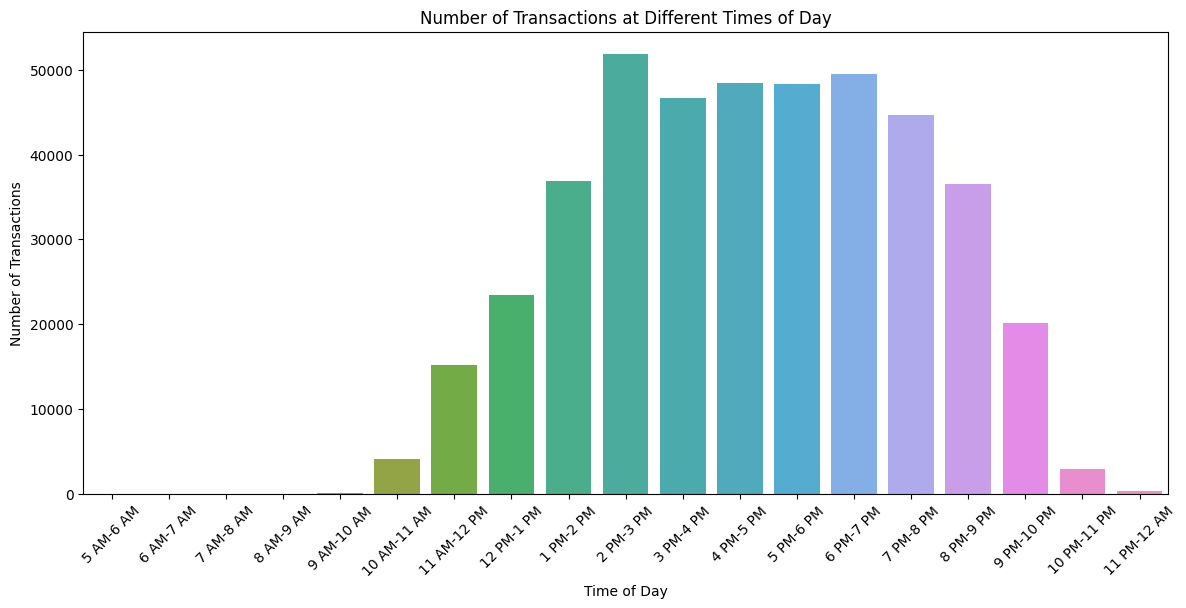

In [41]:
fig, ax  = plt.subplots(figsize=(14,6))
sns.barplot(
    x = num_trans_per_time.index,
    y = num_trans_per_time.values,
    order = desired_order
)
plt.title('Number of Transactions at Different Times of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

# Save the Dataset

In [42]:
df_clean.to_csv('decathlon_data_clean.csv')

In [44]:
# Define the number of samples
n_samples = 500000

# Calculate the proportions for each group
proportions = df_clean['the_transaction_id'].value_counts(normalize=True)

# Define the sampling function
def sample_func(group):
    n = int(n_samples * proportions[group.name])
    return group.sample(n)

# Apply the function to each group
sampled_df = df_clean.groupby('the_transaction_id', group_keys=False).apply(sample_func)

In [46]:
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294601 entries, 232966 to 1734781
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   ctm_customer_id         294601 non-null  object        
 1   the_transaction_id      294601 non-null  object        
 2   but_name_business_unit  294601 non-null  object        
 3   the_date_transaction    294601 non-null  datetime64[ns]
 4   f_qty_item              294601 non-null  int64         
 5   f_to_tax_in             294601 non-null  float64       
 6   the_to_type             294601 non-null  object        
 7   sku_num_sku_r3          294601 non-null  int64         
 8   mdl_num_model_r3        294601 non-null  int64         
 9   Time of Day             294601 non-null  object        
 10  month_number            294601 non-null  int64         
 11  month_name              294601 non-null  object        
 12  Sales                   